# Optimalisasi Klasifikasi _Sleep Disorder_ Menggunakan Metode Decision Tree, Random Forest, K-Nearest Neighbors (KNN), dan SVM

### Dataset Overview

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Dataset Columns

- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

### Details about Sleep Disorder Column:

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

# Import Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('Sleep_health_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.shape

(374, 13)

# Eksplorasi dan Visualisasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df[['BP High', 'BP Low']] = df['Blood Pressure'].str.split('/', expand=True)
df.drop('Blood Pressure', axis=1, inplace=True)
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80


In [6]:
categoric = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
numeric = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'BP High', 'BP Low']]

In [7]:
print(type(numeric))

<class 'pandas.core.frame.DataFrame'>


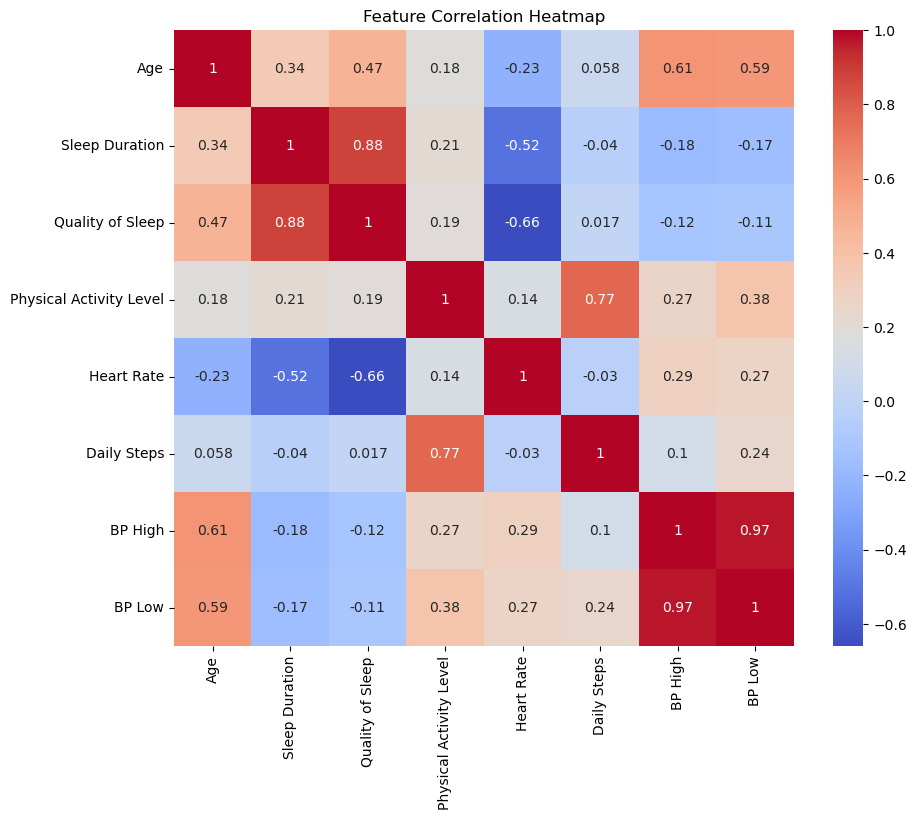

In [8]:
# Create the correlation matrix
corr_matrix = numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

relationship between sleep duration and sleep quality:  0.8832130004106188


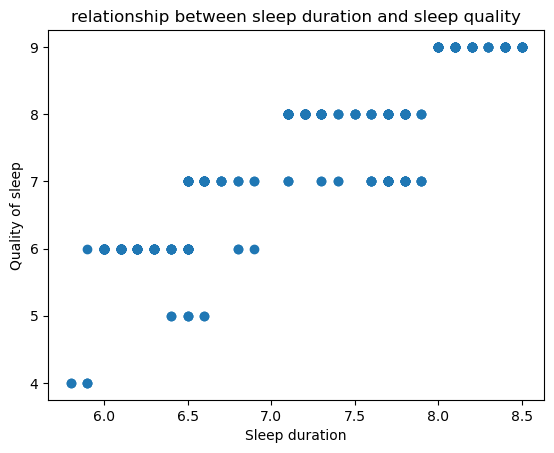

In [9]:
# Relationship between sleep duration an sleep quality
korelasi = df['Sleep Duration'].corr(df['Quality of Sleep'])
print('relationship between sleep duration and sleep quality: ', korelasi)

plt.scatter(df['Sleep Duration'], df['Quality of Sleep'])
plt.xlabel('Sleep duration')
plt.ylabel('Quality of sleep')
plt.title('relationship between sleep duration and sleep quality')
plt.show()

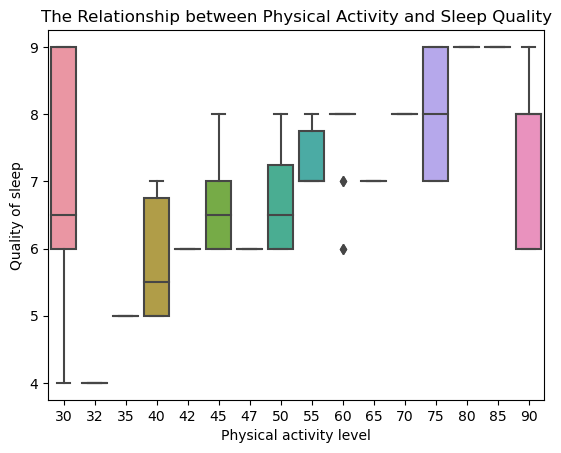

In [10]:
# Relationship between Physical Activity and Sleep Quality
sns.boxplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.xlabel('Physical activity level')
plt.ylabel('Quality of sleep')
plt.title('The Relationship between Physical Activity and Sleep Quality')
plt.show()

-0.8987520310040422


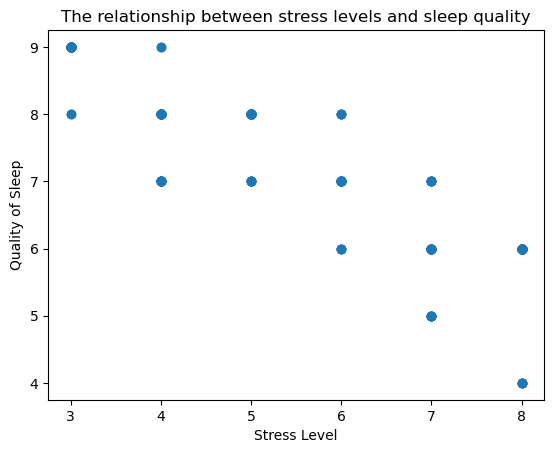

In [11]:
# Relationship between stress levels and sleep quality
stres = df['Stress Level']
kualitas_tdr = df['Quality of Sleep']

kor = stres.corr(kualitas_tdr)
print(kor)

plt.scatter(stres, kualitas_tdr)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('The relationship between stress levels and sleep quality')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


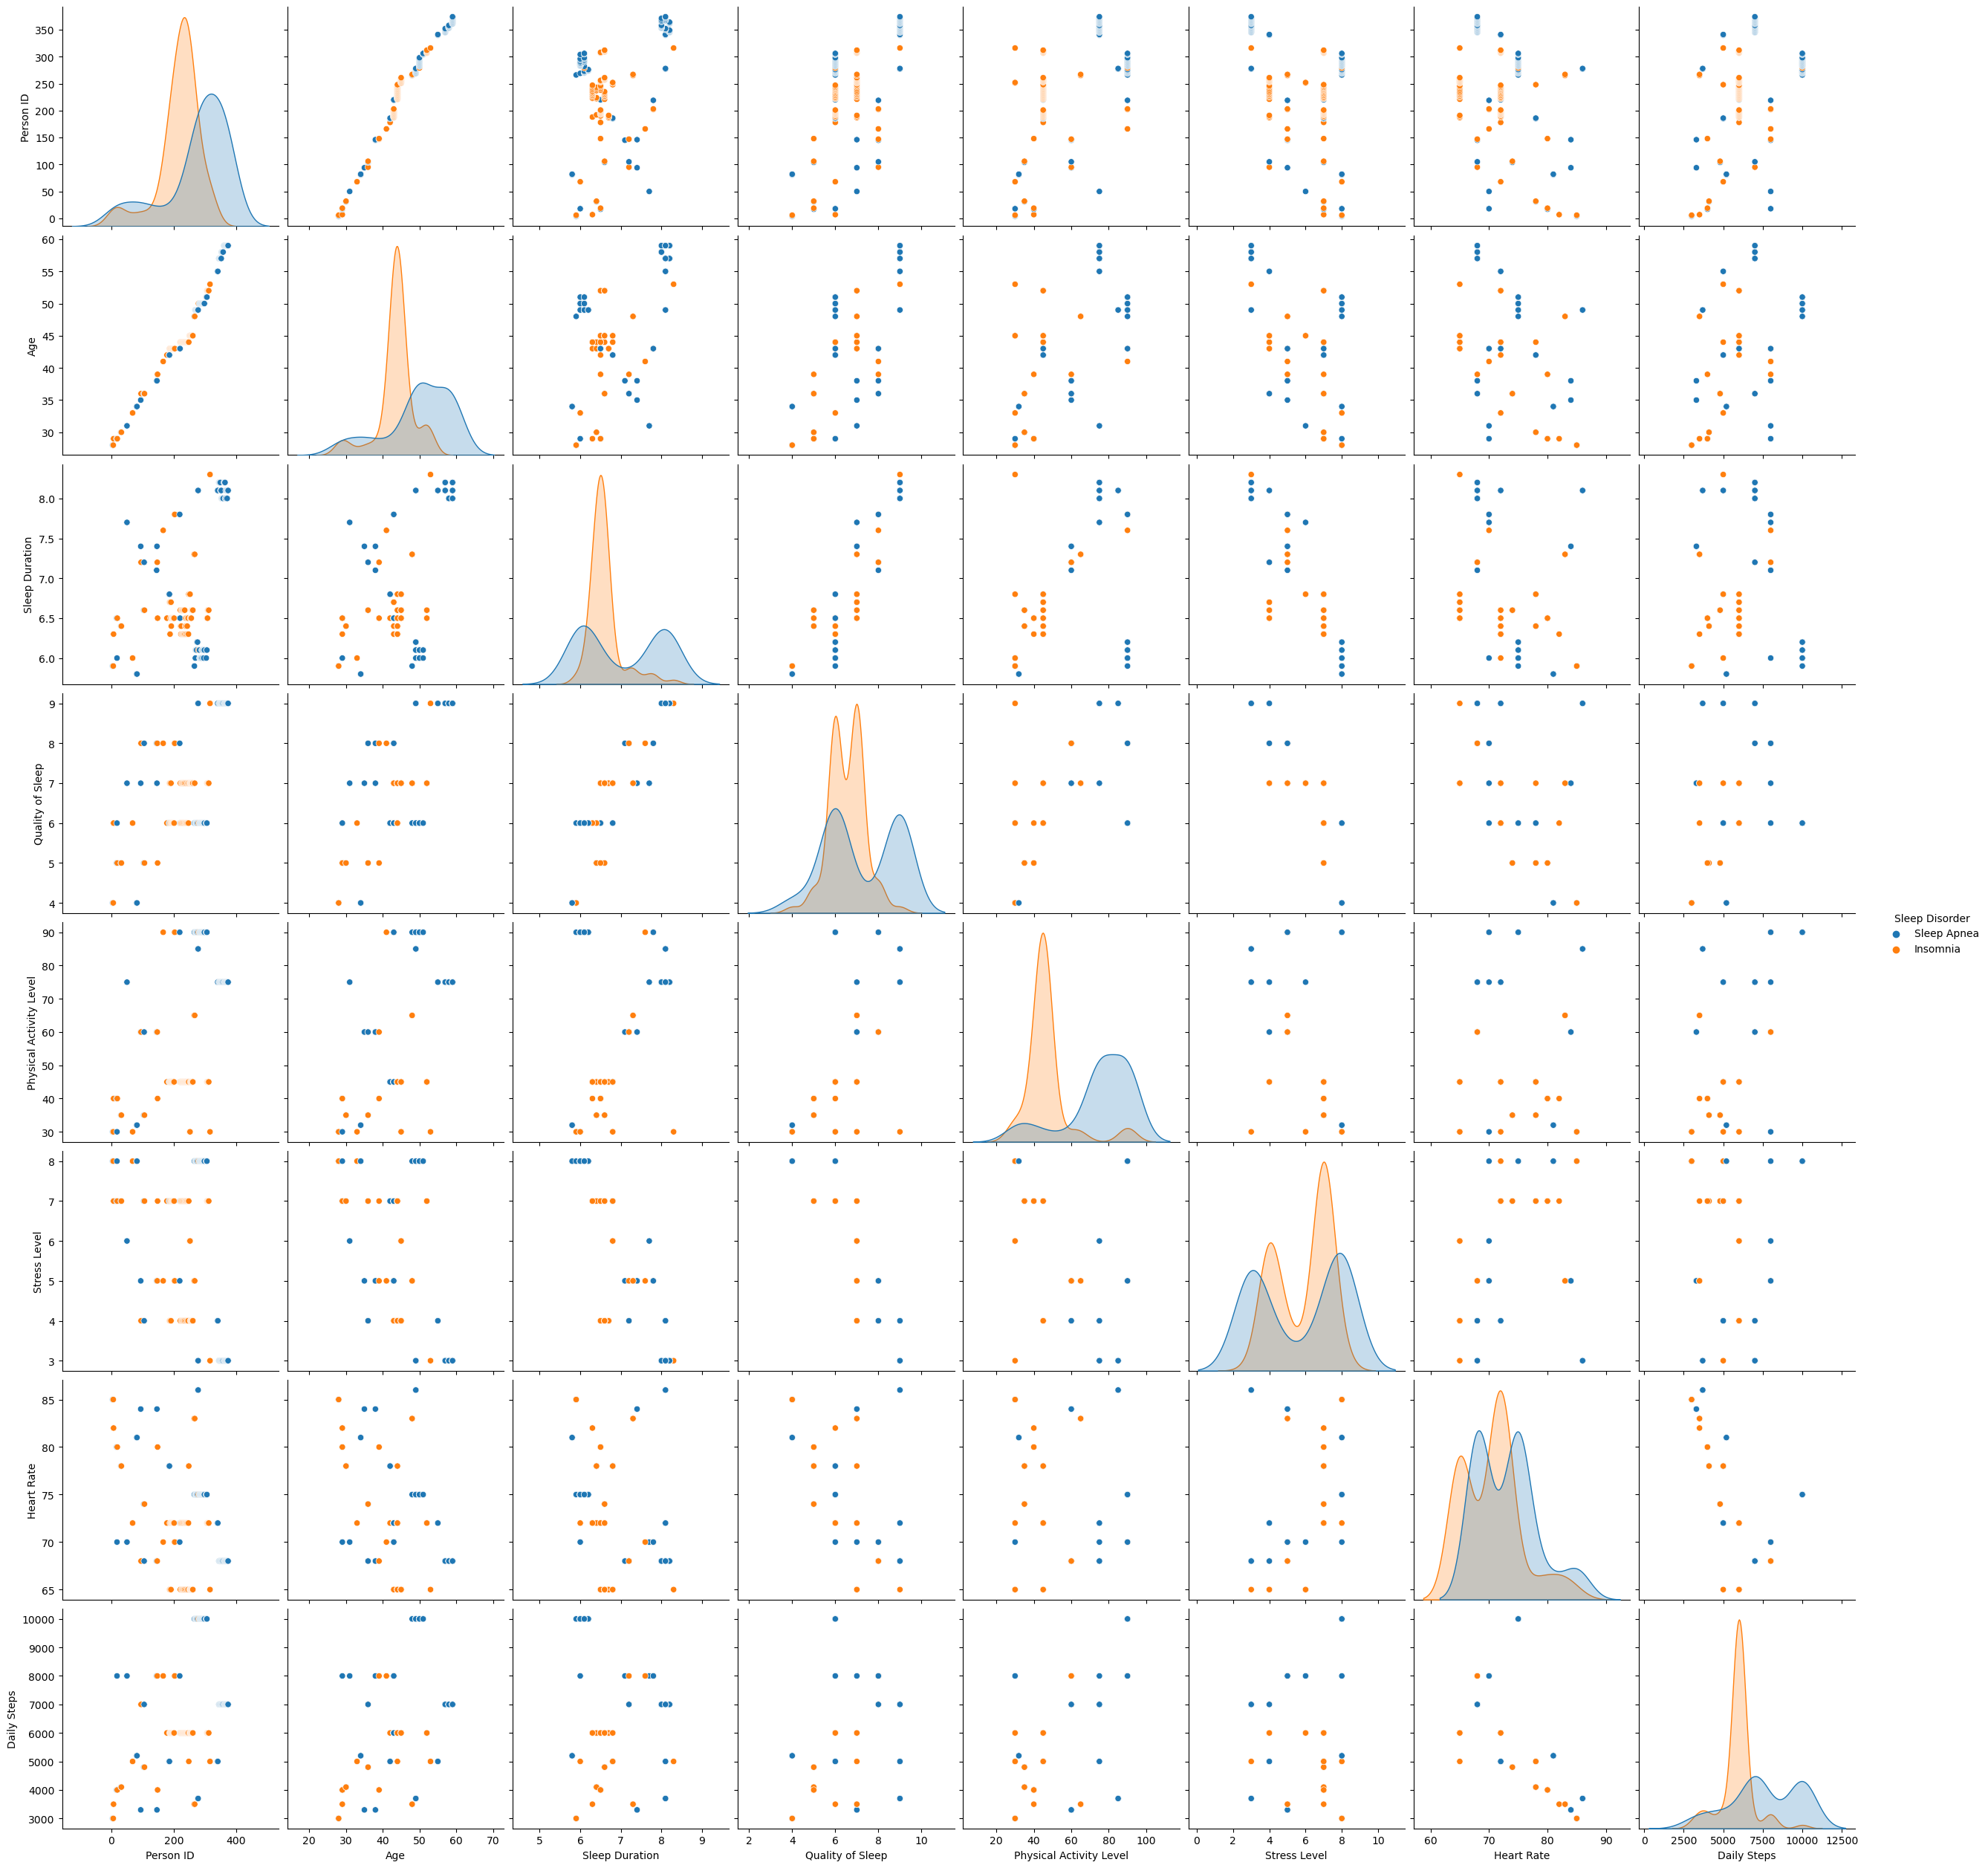

In [12]:
sns.pairplot(df,hue='Sleep Disorder', height=3.2)

In [13]:
# Gender Differences in Sleep Duration
sleep_duration=df['Sleep Duration'].mean()
age = df['Age'].mean()
print('average sleep duration')
print(sleep_duration)
print('age average')
print(age)

average sleep duration
7.132085561497325
age average
42.18449197860963


In [14]:
from pandas._libs.tslibs.period import DIFFERENT_FREQ
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

mean_dur_male = df_male['Sleep Duration'].mean()
mean_dur_female = df_female['Sleep Duration'].mean()

t_statistic, p_value = stats.ttest_ind(df_male['Sleep Duration'], df_female['Sleep Duration'])

print("men's average sleep duration: ",mean_dur_male)
print("women's average sleep duration: ", mean_dur_female)
print("statistic: ", t_statistic)
print("p_value: ", p_value)

men's average sleep duration:  7.036507936507937
women's average sleep duration:  7.22972972972973
statistic:  -2.3624469898393397
p_value:  0.018668859270607456


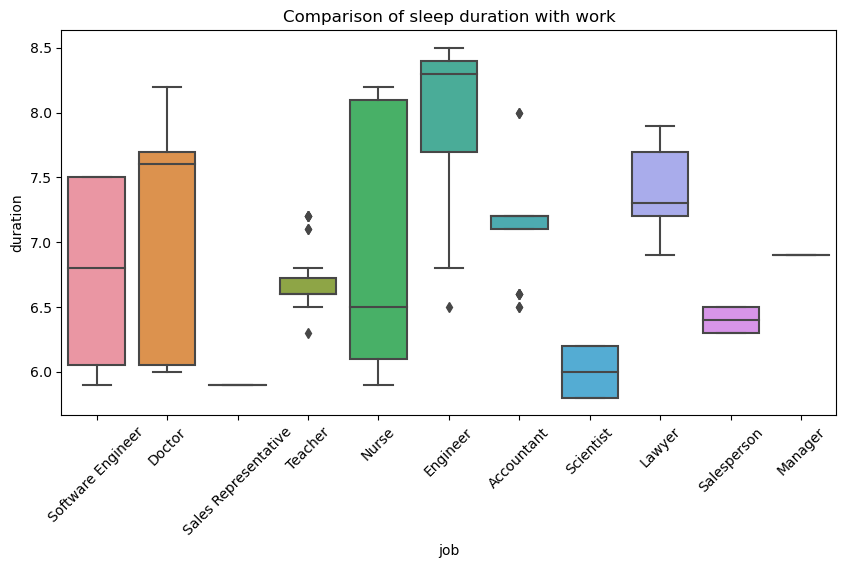

In [15]:
# Occupation and Sleep Duration
plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Comparison of sleep duration with work')
plt.xlabel('job')
plt.ylabel('duration')
plt.xticks(rotation=45)
plt.show()

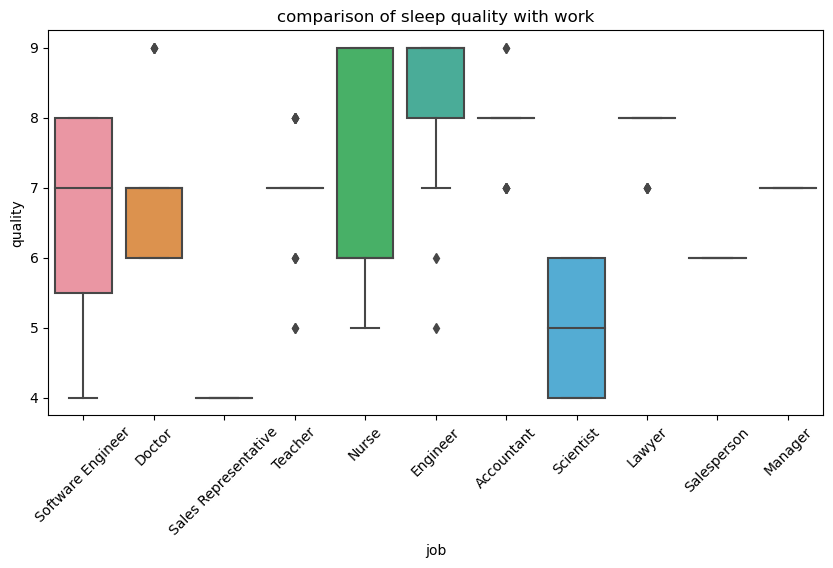

In [16]:
# Occupation and Sleep Quality
plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df)
plt.title('comparison of sleep quality with work')
plt.xlabel('job')
plt.ylabel('quality')
plt.xticks(rotation=45)
plt.show()

# PRE-PROCESSING

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  BP High                  374 non-null    object 
 13  BP Low                   374 non-null    object 
dtypes: float64(1), int64(7), o

In [18]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [19]:
# Check for duplicates across all columns
duplicated = df.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
df[duplicated]

Number of duplicated instances: 0


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low


In [20]:
# Checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
BP High                      0
BP Low                       0
dtype: int64

Tidak terdapat missing value dalam data, kategori orang yang tidak mengalami gangguan tidur yang tercantum pada data adalah "None". Sehingga dia terbaca sebagai Missing Value, jadi perlu dilakukan imputasi dengan mengganti nilai 'NaN' menjadi 'No Sleep Disorder'

In [21]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorder')
df.isna().sum()
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [22]:
df['Sleep Disorder'].unique()

array(['No Sleep Disorder', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [23]:
# Checking for missing values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BP High                    0
BP Low                     0
dtype: int64

In [24]:
# Mengubah kolom BP High dan BP Low dari object menjadi integer
df['BP High'] = df['BP High'].astype(int)
df['BP Low'] = df['BP Low'].astype(int)

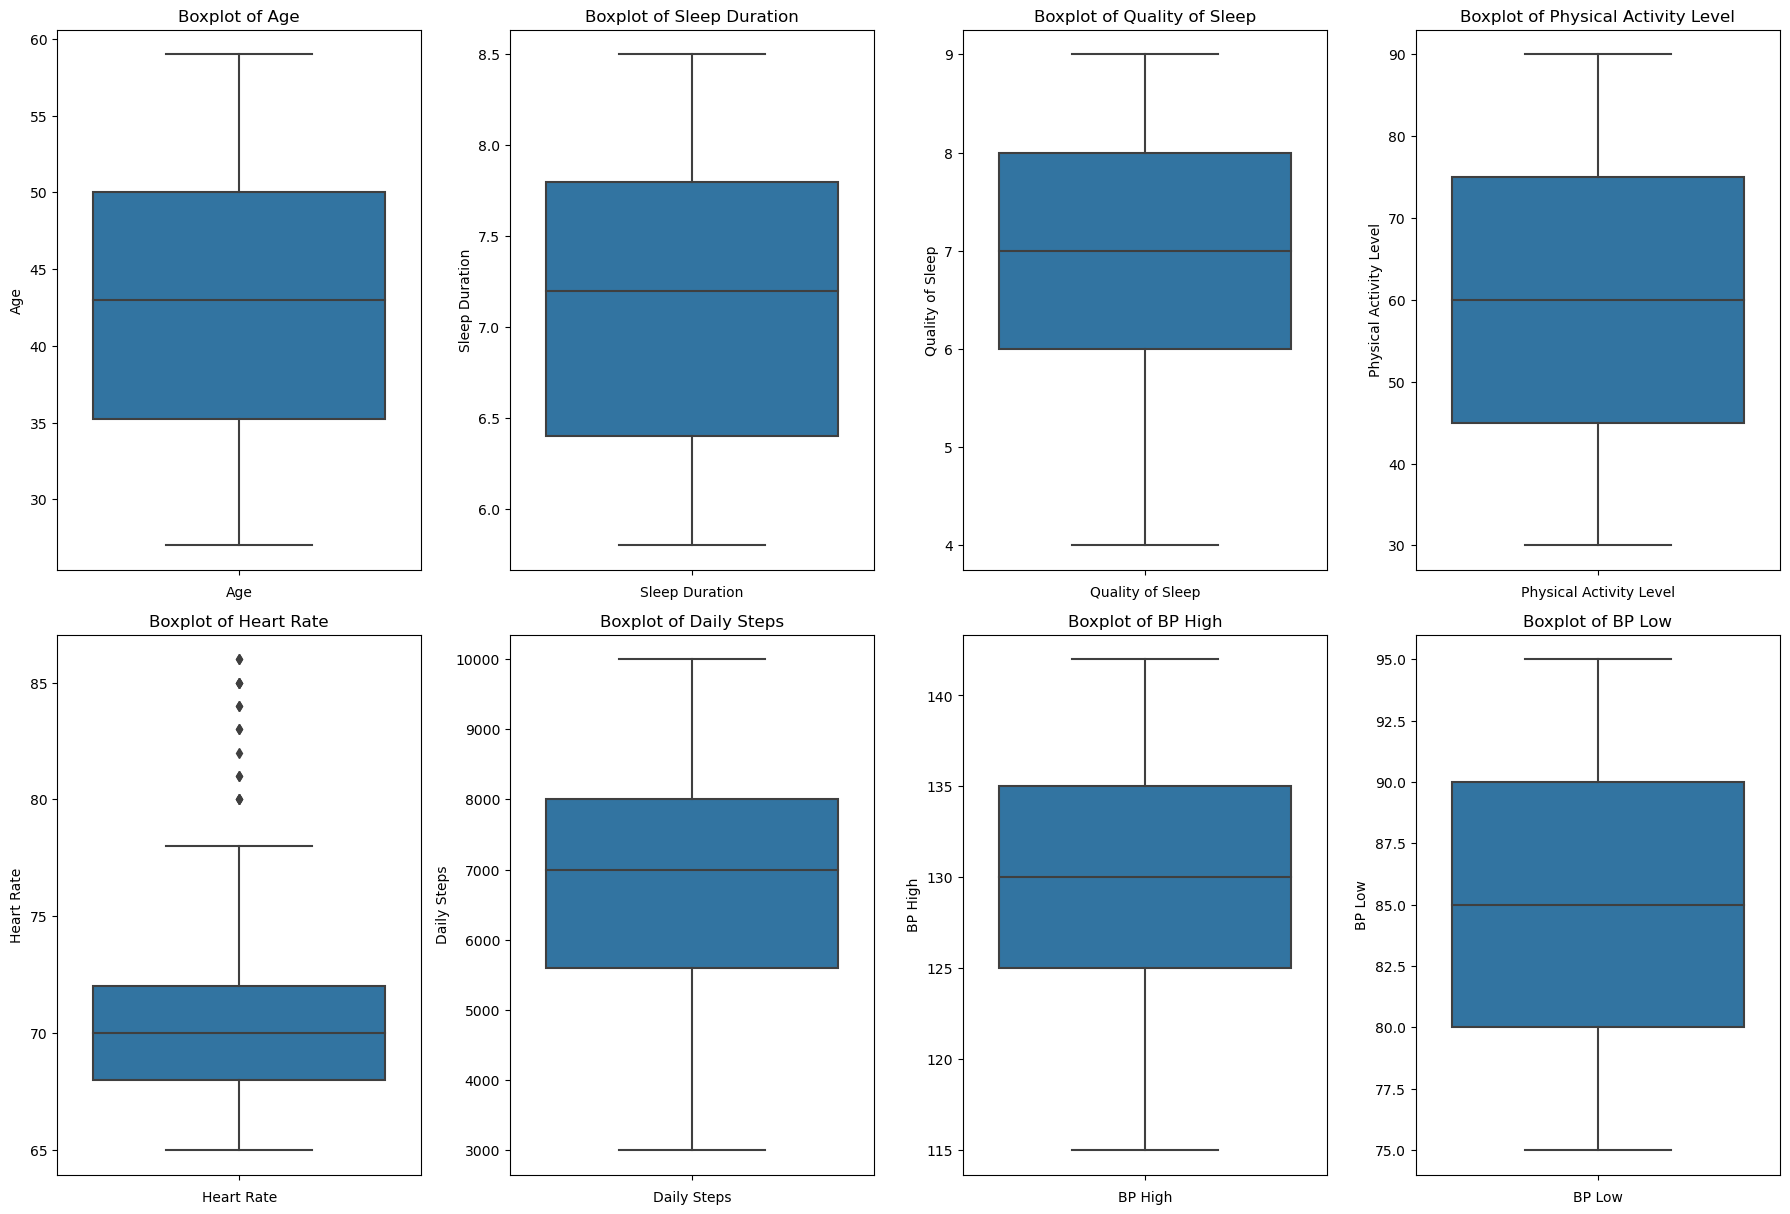

In [25]:
# Checking Outlier
numerical_variables = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'BP High', 'BP Low']

fig, axs = plt.subplots(nrows=len(numerical_variables)//4 + 1, ncols=4, figsize=(18, 6*(len(numerical_variables)//4 + 1)))

for i, var in enumerate(numerical_variables):
    sns.boxplot(y=df[var], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_xlabel(var)
    axs[i//4, i%4].set_title(f'Boxplot of {var}')

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

Berdasarkan plot, terlihat bahwa hanya variabel Heart Rate yang memiliki outlier.

In [26]:
# Handling Outlier
variables = ['Heart Rate']

df_clean = df.copy()

for var in variables:
    if var!= 'concave points_worst':
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean[var] < (Q1 - 1.5 * IQR)) | (df_clean[var] > (Q3 + 1.5 * IQR)))]

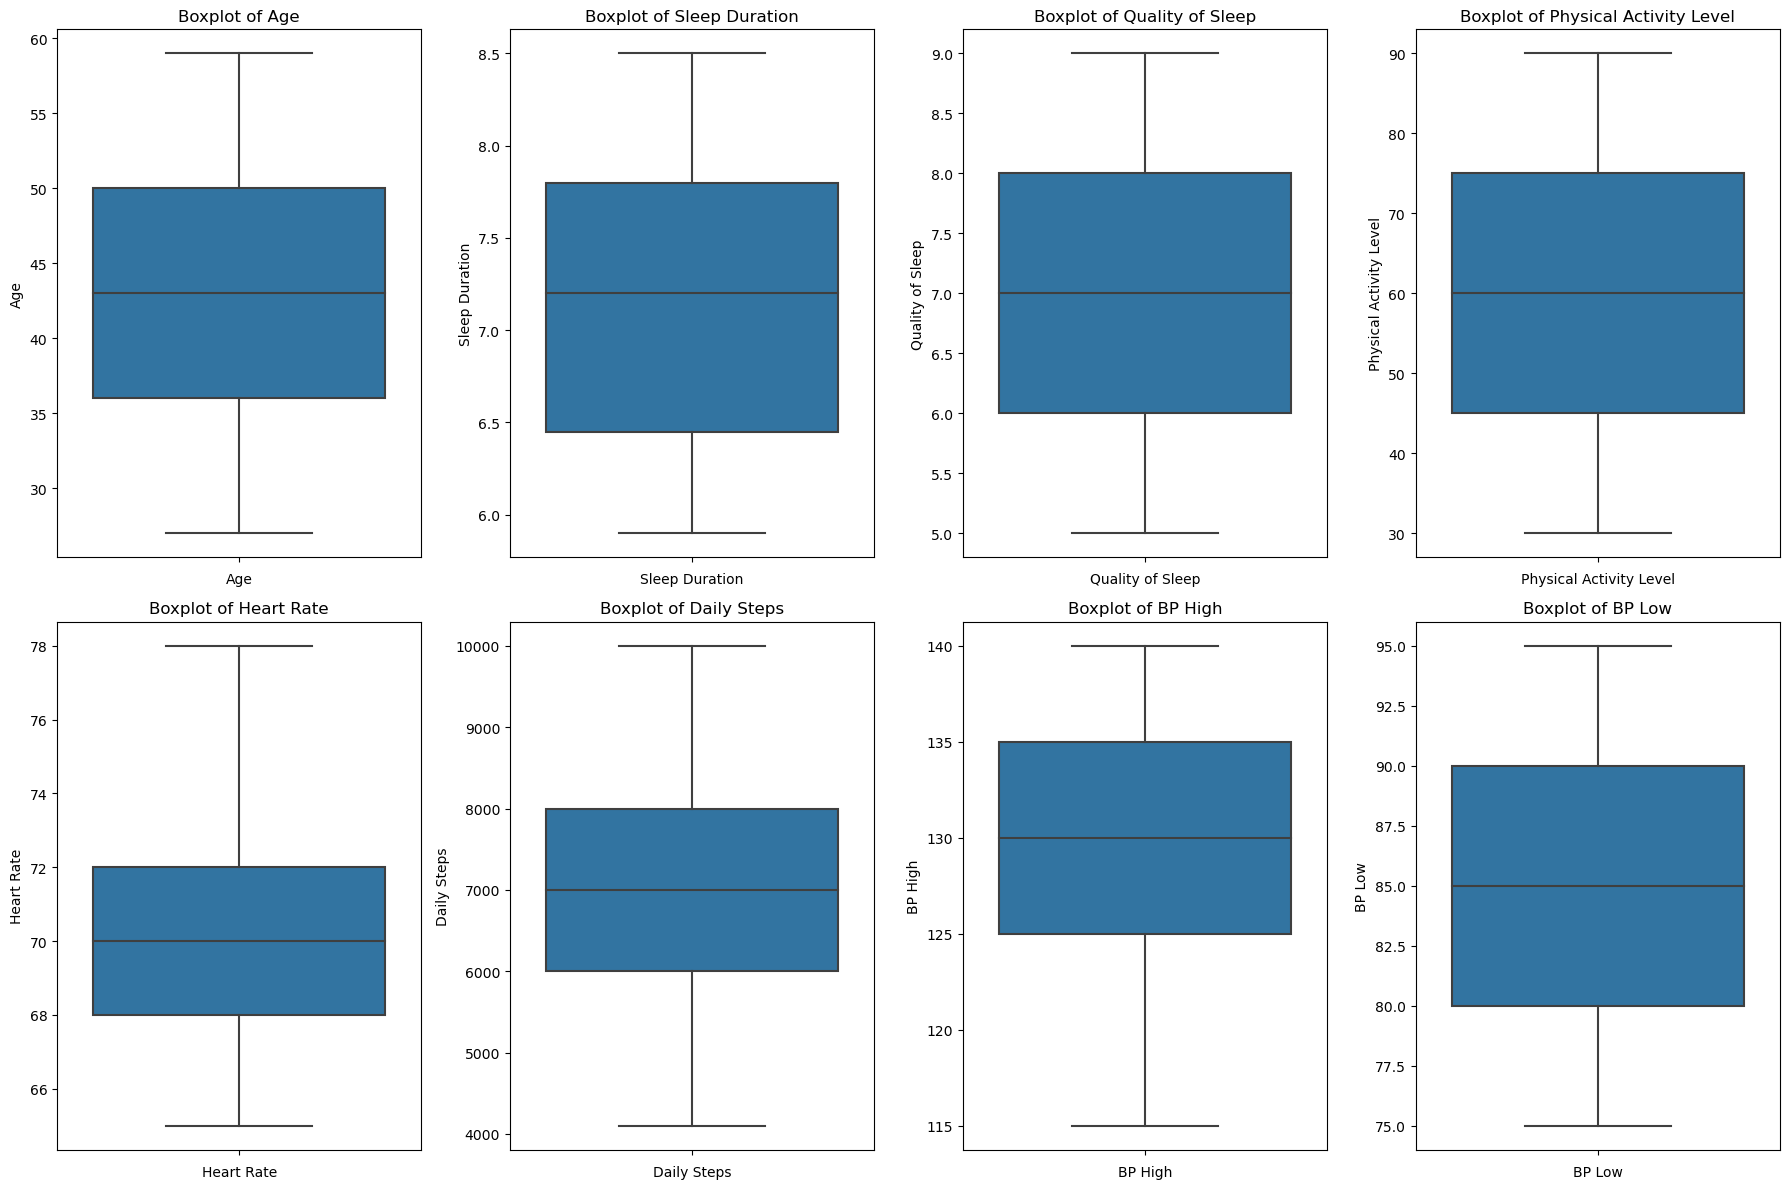

In [27]:
#Checking Outlier after Removal
variables = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
             'Heart Rate', 'Daily Steps', 'BP High', 'BP Low']

num_cols = 4
num_rows = (len(variables) + num_cols - 1) // num_cols

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
axs = axs.flatten()

# Plot the boxplots
for i, var in enumerate(variables):
    sns.boxplot(y=df_clean[var], ax=axs[i])
    axs[i].set_xlabel(var)
    axs[i].set_title(f'Boxplot of {var}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [28]:
#Mengganti type data variabel "Sleep Duration" menjadi object
df_clean['Sleep Duration'] = df_clean['Sleep Duration'].astype('object')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Person ID                359 non-null    int64 
 1   Gender                   359 non-null    object
 2   Age                      359 non-null    int64 
 3   Occupation               359 non-null    object
 4   Sleep Duration           359 non-null    object
 5   Quality of Sleep         359 non-null    int64 
 6   Physical Activity Level  359 non-null    int64 
 7   Stress Level             359 non-null    int64 
 8   BMI Category             359 non-null    object
 9   Heart Rate               359 non-null    int64 
 10  Daily Steps              359 non-null    int64 
 11  Sleep Disorder           359 non-null    object
 12  BP High                  359 non-null    int32 
 13  BP Low                   359 non-null    int32 
dtypes: int32(2), int64(7), object(5)
memory usage: 

In [29]:
df_clean

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,No Sleep Disorder,120,80
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,No Sleep Disorder,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [30]:
df_clean['Sleep Disorder'].value_counts()

Sleep Disorder
No Sleep Disorder    219
Insomnia              71
Sleep Apnea           69
Name: count, dtype: int64

In [31]:
sleep_disorder_counts = df_clean['Sleep Disorder'].value_counts()
sleep_disorder_proportion = sleep_disorder_counts / sleep_disorder_counts.sum()
sleep_disorder_proportion

Sleep Disorder
No Sleep Disorder    0.610028
Insomnia             0.197772
Sleep Apnea          0.192201
Name: count, dtype: float64

In [32]:
# Handling Imbalance Data
from sklearn.utils import resample

No_sleep = df_clean[df_clean['Sleep Disorder'] == 'No Sleep Disorder']
insom_apnea = df_clean[(df_clean['Sleep Disorder'] == 'Insomnia') | (df_clean['Sleep Disorder'] == 'Sleep Apnea')]
minority_samp = resample(No_sleep, replace=True, n_samples=int(0.5*len(insom_apnea)))

df_balanced = pd.concat([insom_apnea, minority_samp])
print(df_balanced['Sleep Disorder'].value_counts())

Sleep Disorder
Insomnia             71
No Sleep Disorder    70
Sleep Apnea          69
Name: count, dtype: int64


# Uji Multikolinearitas

In [33]:
# Menentukan variabel independen
X = df_balanced.drop(['Sleep Disorder'],axis=1)

# Select only numeric columns
X_numeric = X.select_dtypes(include=['float', 'int'])

# Menambahkan konstanta (intersep) ke dalam model
X_numeric = sm.add_constant(X_numeric)

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

                   feature          VIF
0                    const  4869.120418
1                Person ID    57.973870
2                      Age    68.346321
3         Quality of Sleep    11.165555
4  Physical Activity Level     8.183066
5             Stress Level    15.776781
6               Heart Rate     6.233003
7              Daily Steps     8.154920
8                  BP High    64.170758
9                   BP Low    68.623266


## FEATURE SELECTION

In [34]:
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, mutual_info_regression, RFE
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

In [35]:
df_balanced.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BP High', 'BP Low'],
      dtype='object')

In [36]:
df_balanced.drop(['Person ID'],axis=1,inplace=True)
df_balanced

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
17,Male,29,Doctor,6.0,6,30,8,Normal,70,8000,Sleep Apnea,120,80
30,Female,30,Nurse,6.4,5,35,7,Normal Weight,78,4100,Sleep Apnea,130,86
31,Female,30,Nurse,6.4,5,35,7,Normal Weight,78,4100,Insomnia,130,86
49,Male,31,Doctor,7.7,7,75,6,Normal,70,8000,Sleep Apnea,120,80
67,Male,33,Doctor,6.0,6,30,8,Normal,72,5000,Insomnia,125,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Male,30,Doctor,7.7,7,75,6,Normal,70,8000,No Sleep Disorder,120,80
134,Male,38,Lawyer,7.3,8,60,5,Normal,68,8000,No Sleep Disorder,130,85
332,Female,54,Engineer,8.4,9,30,3,Normal,65,5000,No Sleep Disorder,125,80
57,Male,32,Doctor,6.0,6,30,8,Normal,72,5000,No Sleep Disorder,125,80


In [37]:
#Ubah ke dalam bentuk numerik
kategori = ['Gender','Occupation','BMI Category','Sleep Disorder']
encoded_df = LabelEncoder()

for feature in kategori:
    if feature in df.columns.values:
        df_balanced[feature] = encoded_df.fit_transform(df_balanced[feature])

df_balanced.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
17,1,29,1,6.0,6,30,8,0,70,8000,2,120,80
30,0,30,5,6.4,5,35,7,1,78,4100,2,130,86
31,0,30,5,6.4,5,35,7,1,78,4100,0,130,86
49,1,31,1,7.7,7,75,6,0,70,8000,2,120,80
67,1,33,1,6.0,6,30,8,0,72,5000,0,125,80


In [38]:
df_balanced['Sleep Disorder'].unique()

array([2, 0, 1])

In [39]:
X = df_balanced.drop(['Sleep Disorder'],axis=1)
y = df_balanced['Sleep Disorder']

In [40]:
df_balanced.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BP High                    0
BP Low                     0
dtype: int64

In [41]:
# 1. SelectKBest with f_classif
selector_f = SelectKBest(score_func=f_classif, k=10)
X_f = selector_f.fit_transform(X, y)
selected_features_f = X.columns[selector_f.get_support(indices=True)].tolist()

df_f = pd.DataFrame(X_f, columns=selected_features_f)
df_f['Sleep Disorder'] = y.reset_index(drop=True)
df_f

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Daily Steps,BP High,BP Low,Sleep Disorder
0,1,29,1,6.0,6,30,0,8000,120,80,2
1,0,30,5,6.4,5,35,1,4100,130,86,2
2,0,30,5,6.4,5,35,1,4100,130,86,0
3,1,31,1,7.7,7,75,0,8000,120,80,2
4,1,33,1,6.0,6,30,0,5000,125,80,0
...,...,...,...,...,...,...,...,...,...,...,...
205,1,30,1,7.7,7,75,0,8000,120,80,1
206,1,38,3,7.3,8,60,0,8000,130,85,1
207,0,54,2,8.4,9,30,0,5000,125,80,1
208,1,32,1,6.0,6,30,0,5000,125,80,1


In [42]:
# 2. SelectKBest with mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)
X_mutual_info = selector_mutual_info.fit_transform(X, y)
selected_features_mutual_info = X.columns[selector_mutual_info.get_support(indices=True)].tolist()

df_mutual_info = pd.DataFrame(X_mutual_info, columns=selected_features_mutual_info)
df_mutual_info['Sleep Disorder'] = y.reset_index(drop=True)
df_mutual_info

,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BP High,BP Low,Sleep Disorder
0,29,1,6.0,30,8,0,70,8000,120,80,2
1,30,5,6.4,35,7,1,78,4100,130,86,2
2,30,5,6.4,35,7,1,78,4100,130,86,0
3,31,1,7.7,75,6,0,70,8000,120,80,2
4,33,1,6.0,30,8,0,72,5000,125,80,0
...,...,...,...,...,...,...,...,...,...,...,...
205,30,1,7.7,75,6,0,70,8000,120,80,1
206,38,3,7.3,60,5,0,68,8000,130,85,1
207,54,2,8.4,30,3,0,65,5000,125,80,1
208,32,1,6.0,30,8,0,72,5000,125,80,1


In [43]:
# 3. Feature importance from Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X, y)
importances_tree = tree.feature_importances_
indices_tree = importances_tree.argsort()[-10:][::-1]
selected_features_tree = X.columns[indices_tree].tolist()

X_tree = X.iloc[:, indices_tree]
df_tree = pd.DataFrame(X_tree, columns=selected_features_tree)
df_tree['Sleep Disorder'] = y
df_tree

,BP High,BMI Category,Sleep Duration,Age,Quality of Sleep,Gender,Physical Activity Level,Occupation,Stress Level,Daily Steps,Sleep Disorder
17,120,0,6.0,29,6,1,30,1,8,8000,2
30,130,1,6.4,30,5,0,35,5,7,4100,2
31,130,1,6.4,30,5,0,35,5,7,4100,0
49,120,0,7.7,31,7,1,75,1,6,8000,2
67,125,0,6.0,33,6,1,30,1,8,5000,0
...,...,...,...,...,...,...,...,...,...,...,...
21,120,0,7.7,30,7,1,75,1,6,8000,1
134,130,0,7.3,38,8,1,60,3,5,8000,1
332,125,0,8.4,54,9,0,30,2,3,5000,1
57,125,0,6.0,32,6,1,30,1,8,5000,1


In [44]:
# 4. Feature importance from Random Forest
forest = RandomForestClassifier()
forest.fit(X, y)
importances_rf = forest.feature_importances_
indices_rf = importances_rf.argsort()[-10:][::-1]
selected_features_rf = X.columns[indices_rf].tolist()

X_rf = X.iloc[:, indices_rf]
df_rf = pd.DataFrame(X_rf, columns=selected_features_rf)
df_rf['Sleep Disorder'] = y
df_rf

,BP High,BP Low,Physical Activity Level,Age,BMI Category,Sleep Duration,Occupation,Daily Steps,Heart Rate,Quality of Sleep,Sleep Disorder
17,120,80,30,29,0,6.0,1,8000,70,6,2
30,130,86,35,30,1,6.4,5,4100,78,5,2
31,130,86,35,30,1,6.4,5,4100,78,5,0
49,120,80,75,31,0,7.7,1,8000,70,7,2
67,125,80,30,33,0,6.0,1,5000,72,6,0
...,...,...,...,...,...,...,...,...,...,...,...
21,120,80,75,30,0,7.7,1,8000,70,7,1
134,130,85,60,38,0,7.3,3,8000,68,8,1
332,125,80,30,54,0,8.4,2,5000,65,9,1
57,125,80,30,32,0,6.0,1,5000,72,6,1


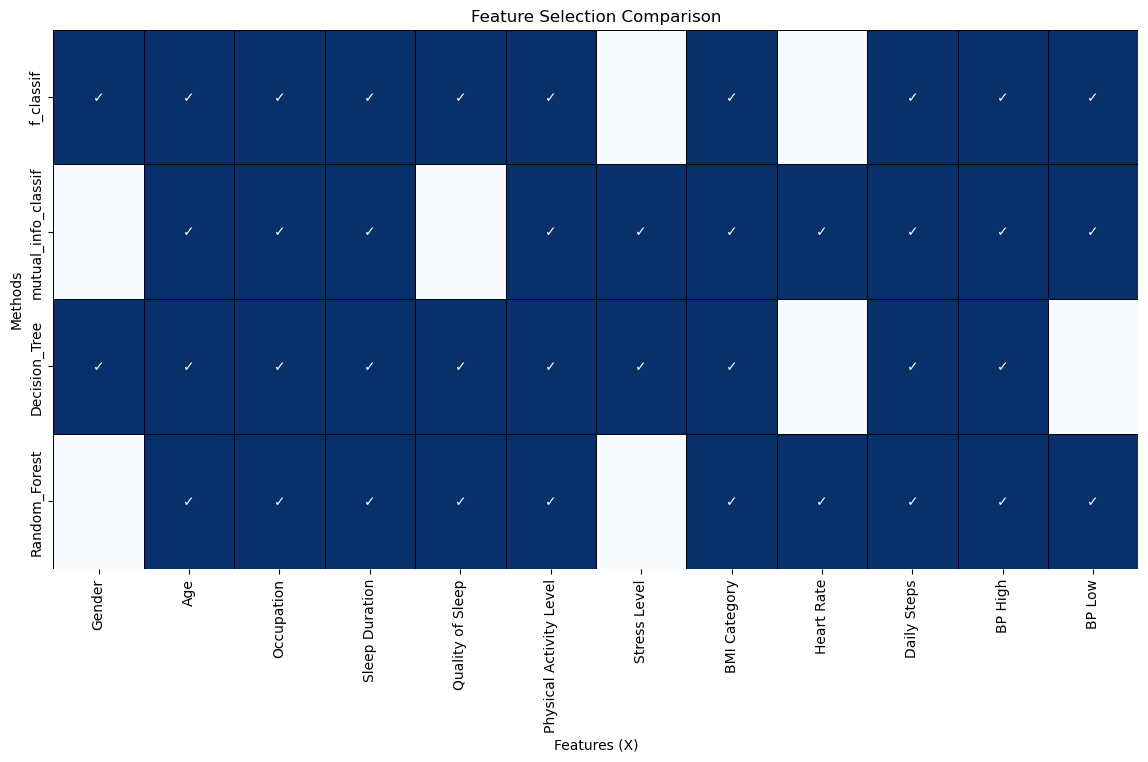

In [45]:
# All features
all_features = df_balanced.drop(['Sleep Disorder'],axis=1).columns.tolist()

# Initialize comparison DataFrame
comparison_df = pd.DataFrame(columns=all_features, index=['f_classif', 'mutual_info_classif', 'Decision_Tree', 'Random_Forest'])

# Mark selected features
comparison_df.loc['f_classif', selected_features_f] = '✓'
comparison_df.loc['mutual_info_classif', selected_features_mutual_info] = '✓'
comparison_df.loc['Decision_Tree', selected_features_tree] = '✓'
comparison_df.loc['Random_Forest', selected_features_rf] = '✓'

# Fill NaN with empty string
comparison_df = comparison_df.fillna('')

# Display the DataFrame
plt.figure(figsize=(14, 7))

# Draw a heatmap with the mask and correct aspect ratio
sns.heatmap(comparison_df.replace('✓', 1).replace('', 0), annot=comparison_df, fmt='', cmap='Blues', cbar=False, linewidths=.5, linecolor='black')

plt.title('Feature Selection Comparison')
plt.xlabel('Features (X)')
plt.ylabel('Methods')
plt.show()

In [46]:
df_new = df_balanced[['Age','Occupation','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 
                      'Heart Rate', 'Daily Steps', 'BP Low', 'Sleep Disorder']]
df_new

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,BP Low,Sleep Disorder
17,29,1,6.0,6,30,0,70,8000,80,2
30,30,5,6.4,5,35,1,78,4100,86,2
31,30,5,6.4,5,35,1,78,4100,86,0
49,31,1,7.7,7,75,0,70,8000,80,2
67,33,1,6.0,6,30,0,72,5000,80,0
...,...,...,...,...,...,...,...,...,...,...
21,30,1,7.7,7,75,0,70,8000,80,1
134,38,3,7.3,8,60,0,68,8000,85,1
332,54,2,8.4,9,30,0,65,5000,80,1
57,32,1,6.0,6,30,0,72,5000,80,1


In [47]:
# Uji Multikolinearitas setelah feature selection
# Menentukan variabel independen
X = df_new.drop(['Sleep Disorder'],axis=1)

# Select only numeric columns
X_numeric = X.select_dtypes(include=['float', 'int'])

# Menambahkan konstanta (intersep) ke dalam model
X_numeric = sm.add_constant(X_numeric)

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

                   feature          VIF
0                    const  3127.352317
1                      Age     5.801546
2               Occupation     3.604587
3         Quality of Sleep     7.718719
4  Physical Activity Level     7.423364
5             BMI Category     6.299802
6               Heart Rate     3.892019
7              Daily Steps     5.743925
8                   BP Low     5.268164


In [48]:
# Variabel
X = df_new.drop(['Sleep Disorder'],axis=1)
y = df_new['Sleep Disorder']

# DECISION TREE

In [49]:
from sklearn import tree
from sklearn.datasets import load_iris,load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Initialize the model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Predictions
y_pred_tm = tree_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_tm)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


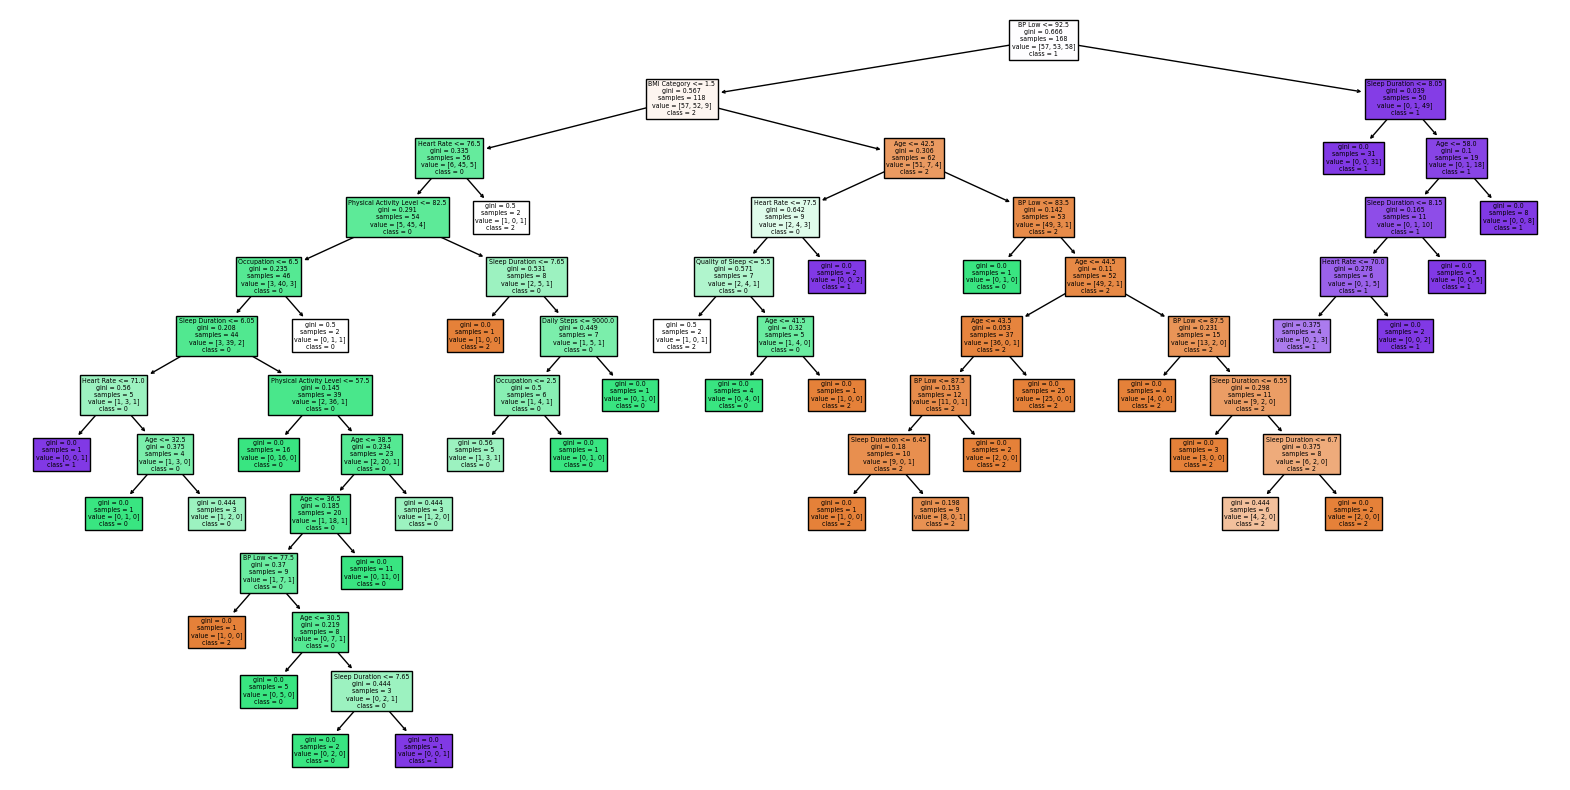

In [53]:
# Define feature_names and target_names
feature_names = X.columns.tolist()
target_names = y.unique().astype(str).tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [54]:
importances = tree_model.feature_importances_

In [55]:
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0936
Occupation: 0.0091
Sleep Duration: 0.0408
Quality of Sleep: 0.0144
Physical Activity Level: 0.0094
BMI Category: 0.2986
Heart Rate: 0.0539
Daily Steps: 0.0015
BP Low: 0.4788


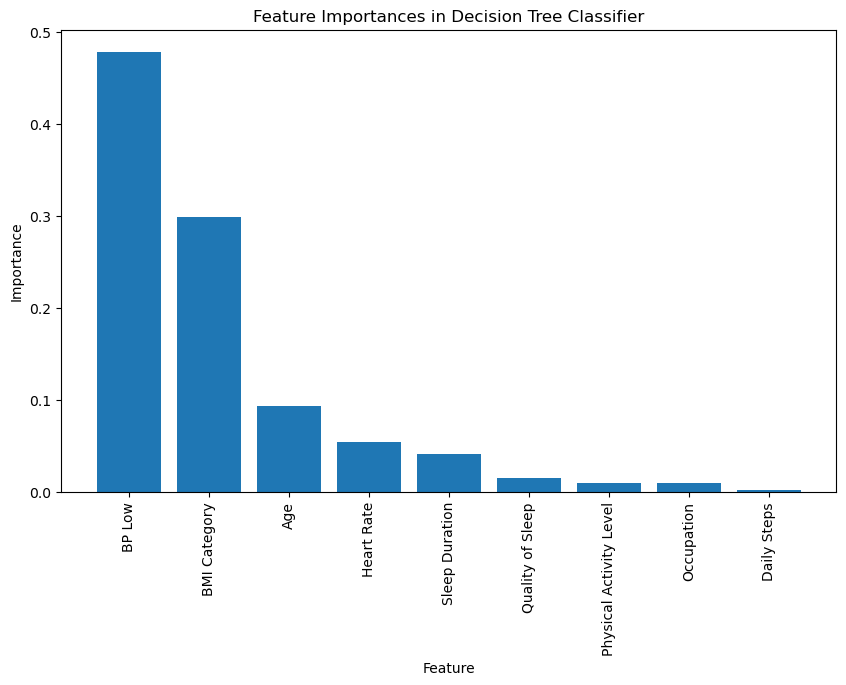

In [56]:
# Creating labels and indices sorted by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Decision Tree Classifier')
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [57]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [59]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.86


In [60]:
# Initialize the model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=1, min_samples_split=10)

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=10)

In [61]:
# Predictions
y_pred_tm = tree_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_tm)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9048


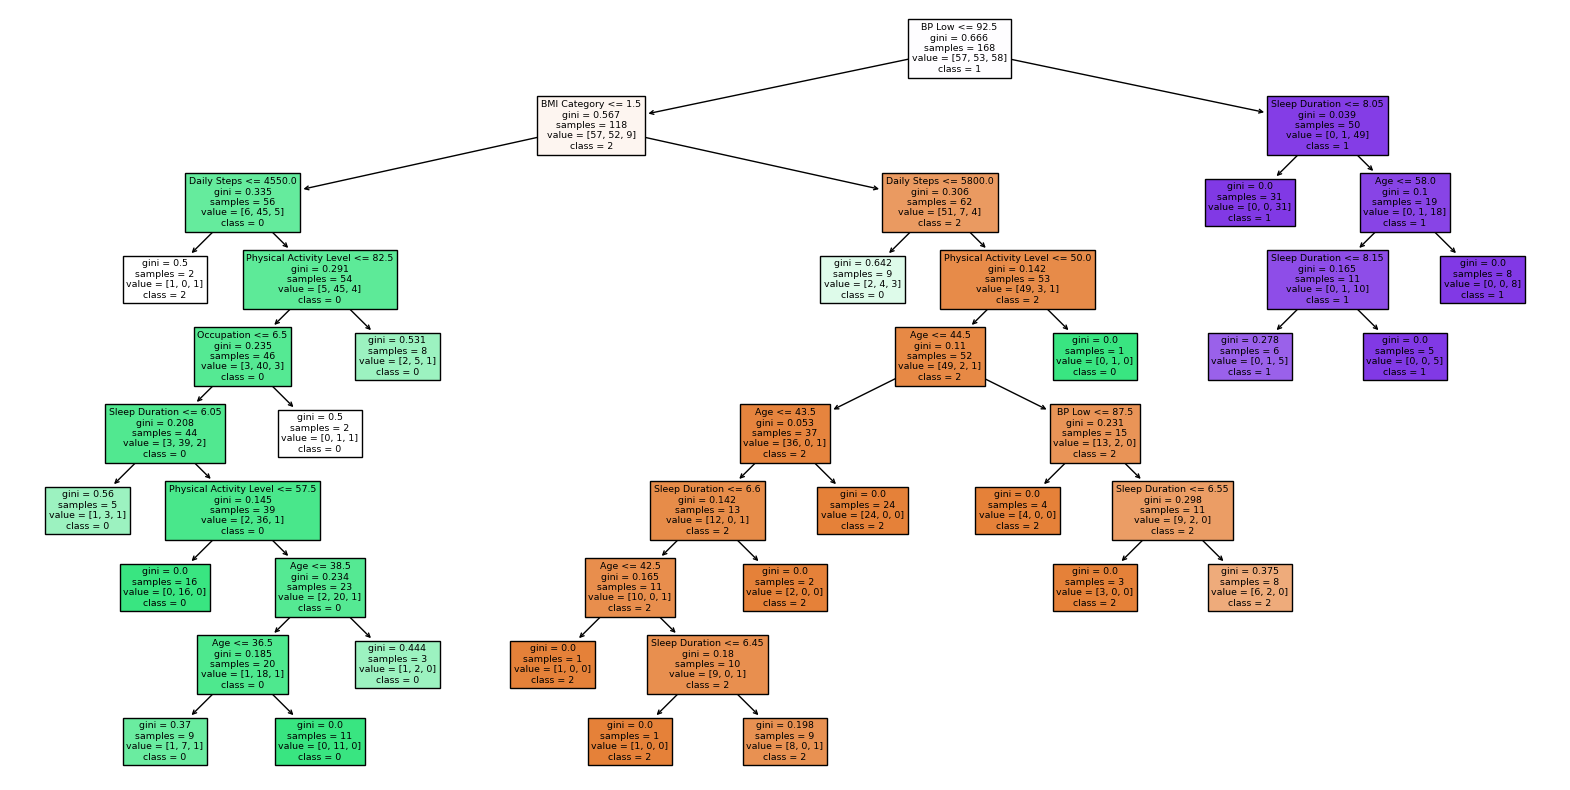

In [62]:
# Define feature_names and target_names
feature_names = X.columns.tolist()
target_names = y.unique().astype(str).tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [63]:
importances = tree_model.feature_importances_

In [64]:
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0144
Occupation: 0.0080
Sleep Duration: 0.0144
Quality of Sleep: 0.0000
Physical Activity Level: 0.0313
BMI Category: 0.3386
Heart Rate: 0.0000
Daily Steps: 0.0898
BP Low: 0.5035


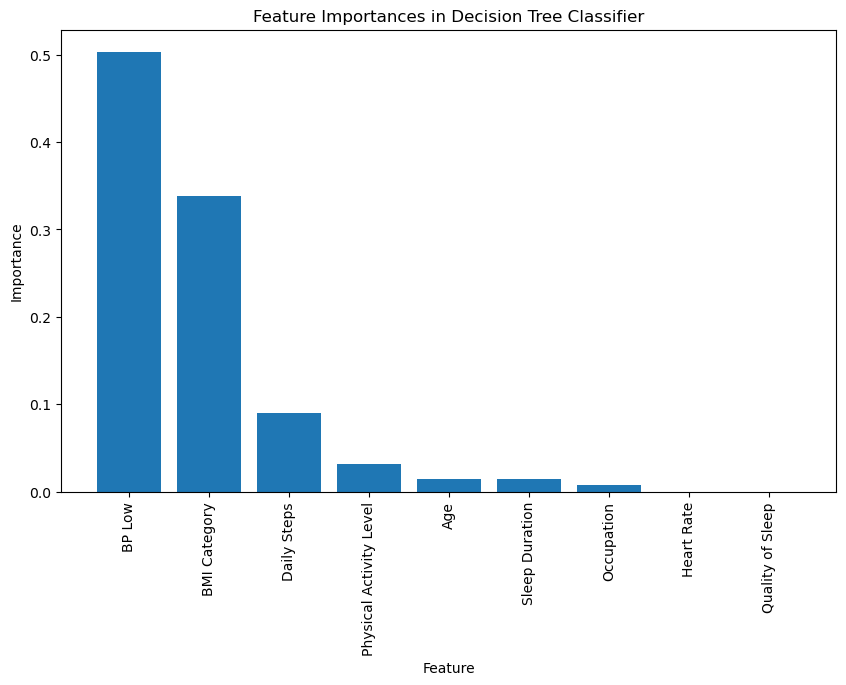

In [65]:
# Creating labels and indices sorted by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Decision Tree Classifier')
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [66]:
from scipy.stats import randint
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

In [67]:
random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(max_depth=20,
                                                    min_samples_split=10),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002ECF82BA790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002ECF82E5290>},
                   random_state=42, scoring='accuracy')

In [68]:
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best cross-validation score: 0.8571


In [69]:
# Initialize the model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=1, min_samples_split=9)

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_split=9)

In [70]:
# Predictions
y_pred_tm = tree_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_tm)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9048


In [71]:
df_dect = df_new[['Sleep Disorder', 'BP Low', 'BMI Category', 'Daily Steps', 'Physical Activity Level']]
df_dect

,Sleep Disorder,BP Low,BMI Category,Daily Steps,Physical Activity Level
17,2,80,0,8000,30
30,2,86,1,4100,35
31,0,86,1,4100,35
49,2,80,0,8000,75
67,0,80,0,5000,30
...,...,...,...,...,...
21,1,80,0,8000,75
134,1,85,0,8000,60
332,1,80,0,5000,30
57,1,80,0,5000,30


In [124]:
# Variabel importances
Xd = df_dect.drop(['Sleep Disorder'],axis=1)
yd = df_dect['Sleep Disorder']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.2, random_state=42)

In [126]:
# Initialize the model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [127]:
# Predictions
y_pred = tree_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


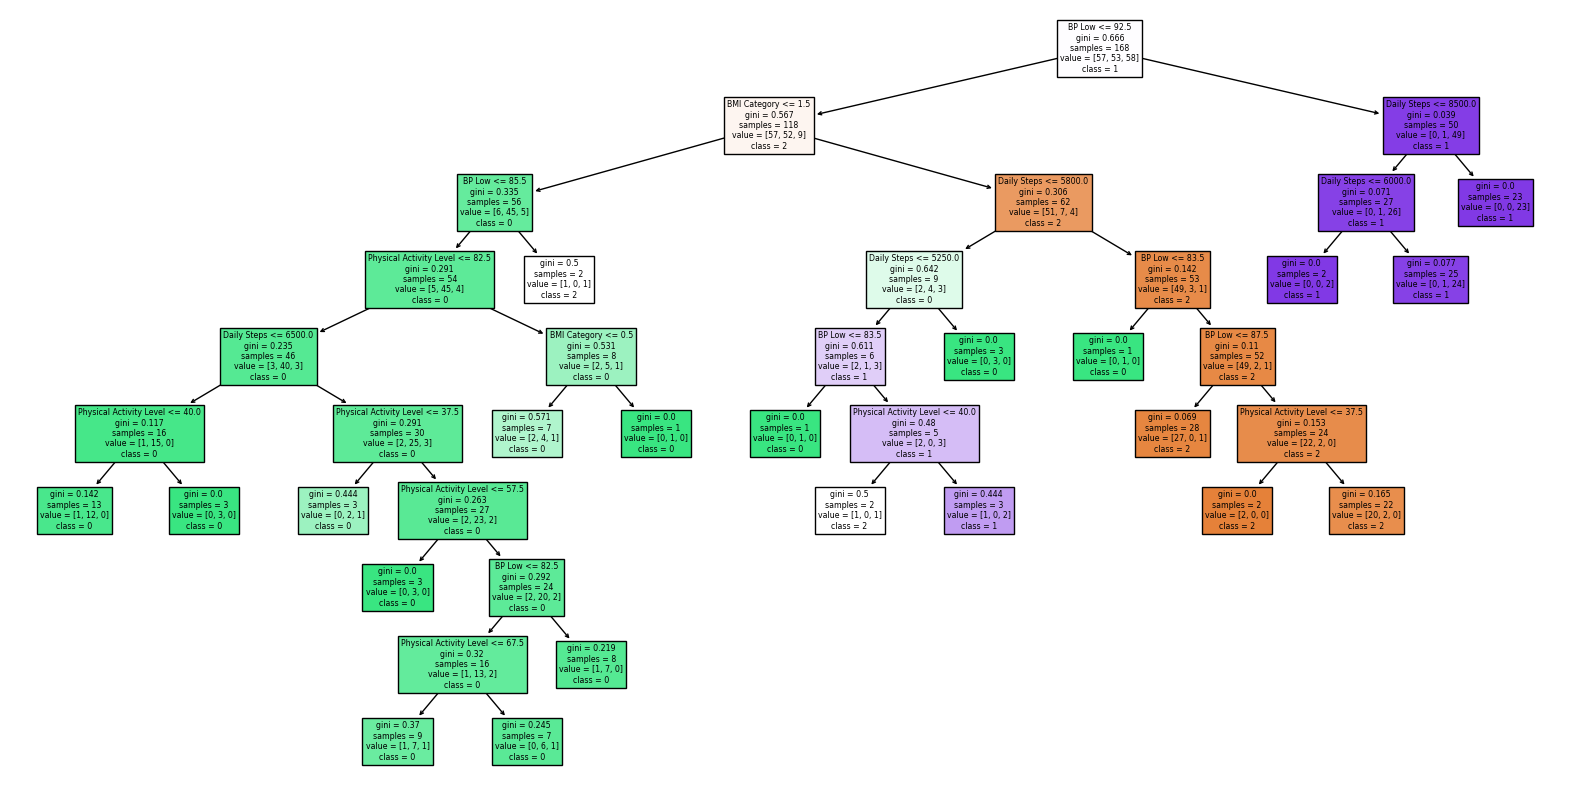

In [128]:
# Define feature_names and target_names
feature_names = Xd.columns.tolist()
target_names = yd.unique().astype(str).tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [129]:
from scipy.stats import randint
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

In [130]:
random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002ECF9BC94D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002ECF9B4A210>},
                   random_state=42, scoring='accuracy')

In [131]:
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 3, 'min_samples_split': 4}
Best cross-validation score: 0.8690


In [140]:
# Initialize the model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=40, min_samples_leaf=3, min_samples_split=4)

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=4)

In [141]:
# Predictions
y_pred_dt3 = tree_model.predict(X_test)

# Evaluate accuracy
accuracy_dt3 = accuracy_score(y_test, y_pred_dt3)
print(f"Accuracy: {accuracy_dt3:.4f}")

Accuracy: 0.9048


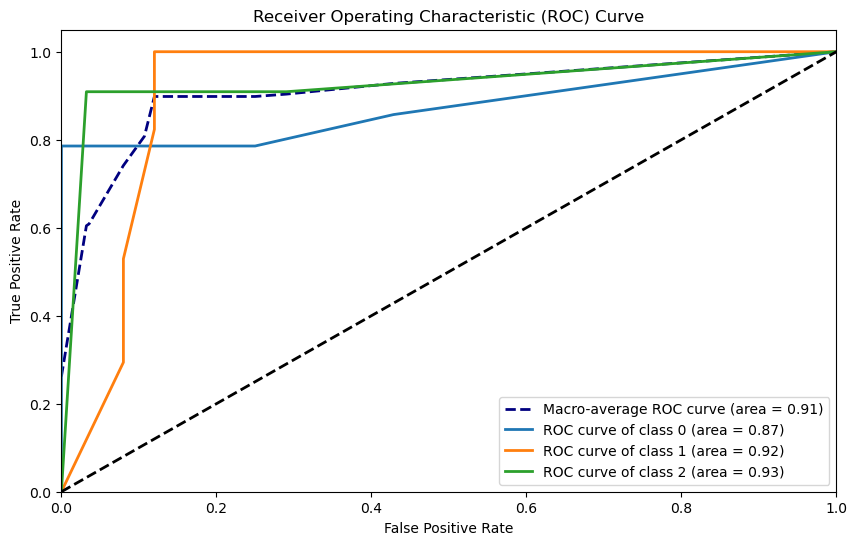

Macro-average AUC: 0.9085
AUC of class 0: 0.8737
AUC of class 1: 0.9188
AUC of class 2: 0.9267


In [142]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model with best parameters
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=40, min_samples_leaf=3, min_samples_split=4)
ovr_tree_model = OneVsRestClassifier(tree_model)
y_score = ovr_tree_model.fit(X_train, y_train).predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', linewidth=2, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores
print(f'Macro-average AUC: {roc_auc["macro"]:.4f}')
for i in range(n_classes):
    print(f'AUC of class {i}: {roc_auc[i]:.4f}')


# RANDOM FOREST

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 9), (42, 9), (168,), (42,))

In [84]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9048


In [86]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [87]:
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_rf1 = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy_rf1:.4f}")

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8810
Test Accuracy: 0.8810


In [88]:
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(175, 225),
    'max_features': ['log2'],
    'max_depth': [None],
    'min_samples_split': randint(3, 7),
    'min_samples_leaf': randint(1, 2)
}

In [89]:
model = RandomForestClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))
predictions = random_search.best_estimator_.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy_rf2:.4f}")

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 210}
Best cross-validation score: 0.8750
Test Accuracy: 0.9048


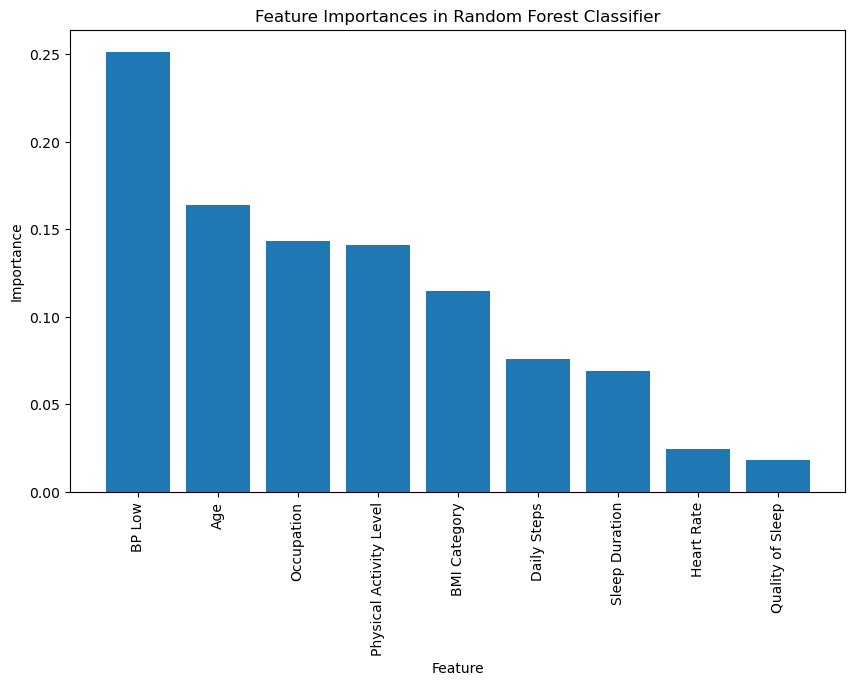

In [90]:
importances = random_search.best_estimator_.feature_importances_

# Creating labels and indices sorted by importance
indices = np.argsort(importances)[::-1]
sorted_features = [X.columns[i] for i in indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest Classifier')
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [91]:
df_ranf = df_new[['BP Low', 'Age', 'Occupation', 'Physical Activity Level', 'Sleep Disorder']]
df_ranf

,BP Low,Age,Occupation,Physical Activity Level,Sleep Disorder
17,80,29,1,30,2
30,86,30,5,35,2
31,86,30,5,35,0
49,80,31,1,75,2
67,80,33,1,30,0
...,...,...,...,...,...
21,80,30,1,75,1
134,85,38,3,60,1
332,80,54,2,30,1
57,80,32,1,30,1


In [92]:
# Variabel
Xrf = df_ranf.drop(['Sleep Disorder'],axis=1)
yrf = df_ranf['Sleep Disorder']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(Xrf, yrf, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 4), (42, 4), (168,), (42,))

In [94]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)
accuracy_ranf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_ranf:.4f}")

Accuracy: 0.8333


In [95]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [96]:
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_ranf2 = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy_ranf2:.4f}")

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.8810
Test Accuracy: 0.9048


In [97]:
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(175, 225),
    'max_features': ['log2'],
    'max_depth': [None],
    'min_samples_split': randint(3, 7),
    'min_samples_leaf': randint(1, 2)
}

In [98]:
model = RandomForestClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))
predictions = random_search.best_estimator_.predict(X_test)
accuracy_ranf3 = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy_ranf3:.4f}")

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 192}
Best cross-validation score: 0.8690
Test Accuracy: 0.9048


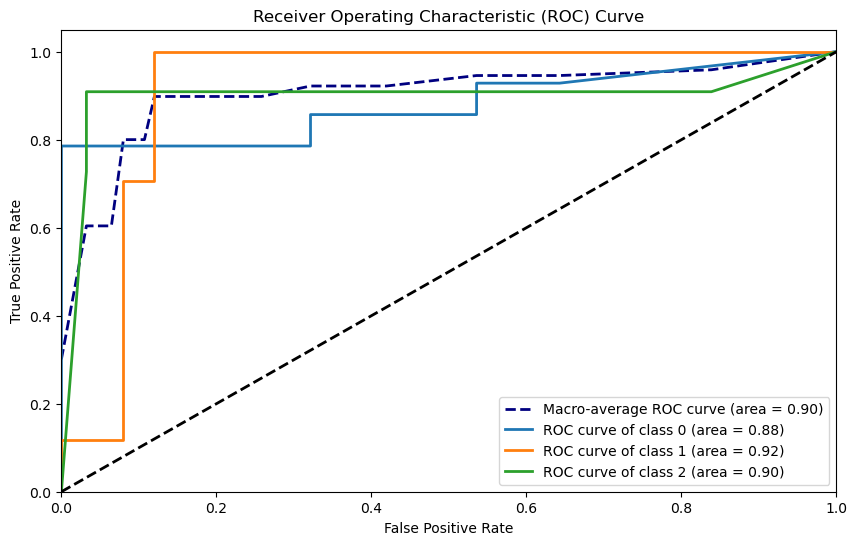

Macro-average AUC: 0.90
AUC of class 0: 0.88
AUC of class 1: 0.92
AUC of class 2: 0.90
Accuracy: 0.9048


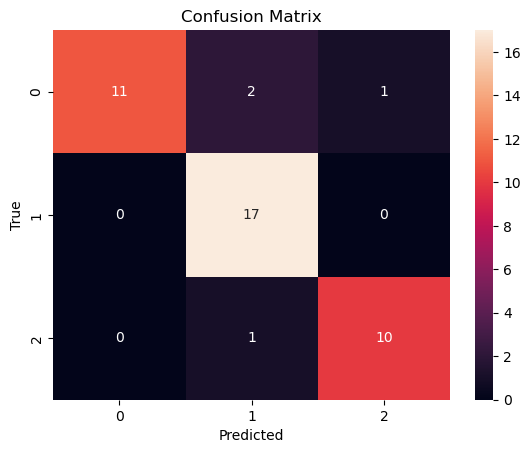

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.85      1.00      0.92        17
           2       0.91      0.91      0.91        11

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



In [143]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming you have a dataset X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model with the specified best parameters
best_params = {
    'max_depth': None,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 192
}

rf_model = OneVsRestClassifier(RandomForestClassifier(**best_params, random_state=42))
rf_model.fit(X_train, y_train)

# Predict probabilities
y_score_rf = rf_model.predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', linewidth=2, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores
print(f'Macro-average AUC: {roc_auc["macro"]:.2f}')
for i in range(n_classes):
    print(f'AUC of class {i}: {roc_auc[i]:.2f}')

# Predict labels
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Confusion matrix and classification report
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred_rf))


# K-Nearest Neighbors (KNN)

In [99]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 9), (42, 9), (168,), (42,))

In [101]:
#normalize the data
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [102]:
#initialize the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=5)

In [103]:
#train the KNN algorithm
knn.fit(X_train_knn, y_train)

KNeighborsClassifier()

In [104]:
#make predictions on the test set
y_pred_knn = knn.predict(X_test_knn)

In [105]:
#evaluate the performance of the KNN algorithm
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

Accuracy: 0.9048


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.85      1.00      0.92        17
           2       0.91      0.91      0.91        11

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



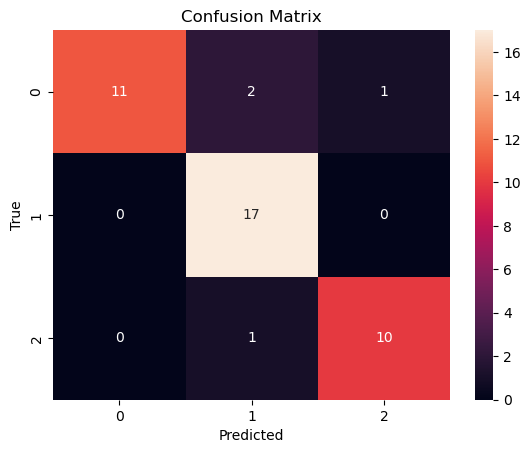

In [151]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_knn))

In [107]:
def find_best_k_with_grid_search(X_train, y_train, X_test, y_test, param_grid):
    # Create a KNN classifier
    knn = KNeighborsClassifier()

    # Perform GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_knn, y_train)

    # Get the best parameter
    best_k = grid_search.best_params_['n_neighbors']

    # Fit model with best k on entire training set
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train_knn, y_train)

    # Calculate accuracy on train and test set
    train_accuracy = best_knn.score(X_train_knn, y_train)
    test_accuracy = best_knn.score(X_test_knn, y_test)
    
    return grid_search.best_params_, train_accuracy, test_accuracy


# Assuming you have X_train, y_train variables
max_k=50

# Define a grid of hyperparameters
parameters = {'n_neighbors': range(2, max_k + 1)}

best_params, train_accuracy, test_accuracy = find_best_k_with_grid_search(X_train, y_train, X_test, y_test, parameters)
print(f"Best k: {best_params['n_neighbors']}")
print(f"Train Accuracy with Best k: {train_accuracy*100:.2f}%")
print(f"Test Accuracy with Best k: {test_accuracy*100:.2f}%")

Best k: 5
Train Accuracy with Best k: 89.29%
Test Accuracy with Best k: 90.48%


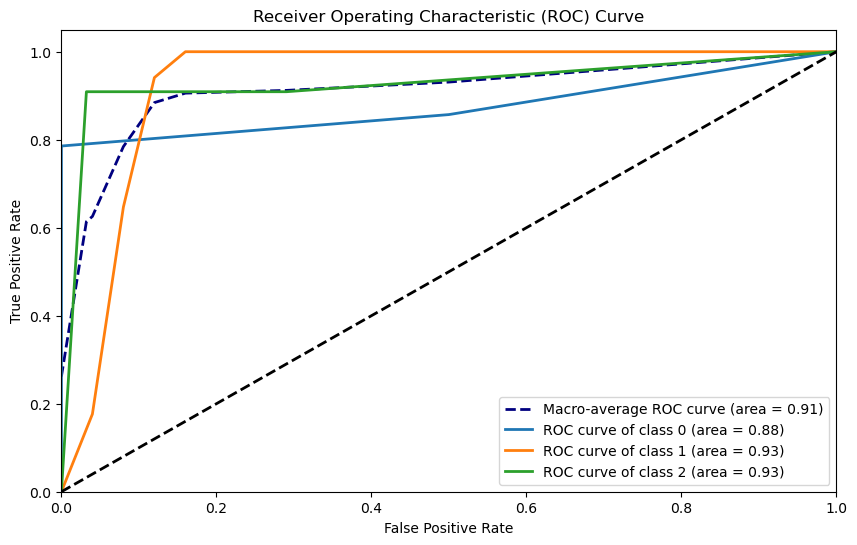

Macro-average AUC: 0.91
AUC of class 0: 0.88
AUC of class 1: 0.93
AUC of class 2: 0.93
Accuracy: 0.9048


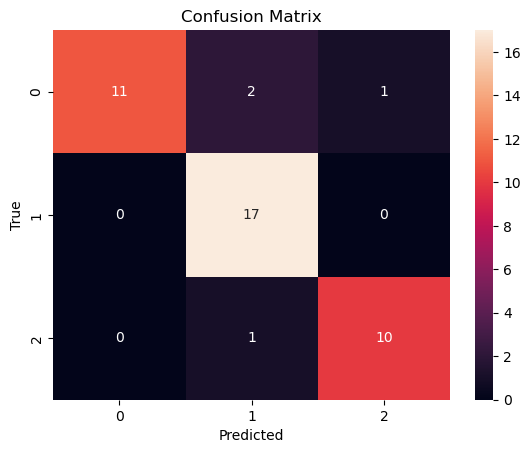

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.85      1.00      0.92        17
           2       0.91      0.91      0.91        11

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



In [138]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

# Initialize and fit the KNN model with OneVsRestClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_model.fit(X_train_knn, y_train)

# Predict probabilities
y_score = knn_model.predict_proba(X_test_knn)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', linewidth=2, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores
print(f'Macro-average AUC: {roc_auc["macro"]:.2f}')
for i in range(n_classes):
    print(f'AUC of class {i}: {roc_auc[i]:.2f}')

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

# Confusion matrix and classification report
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred_knn))


# **SUPPORT** **VECTOR** **MACHINE**

In [108]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 9), (42, 9), (168,), (42,))

In [110]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [111]:
model.score(X_test,y_test)

0.6190476190476191

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
model.score(X_test_scaled, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.3333333333333333

In [114]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

In [115]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf']  # Kernel types to try
}

# Create a base model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=10, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# View the best parameters found by GridSearchCV
best_parameters_svm = grid_search.best_params_
print(f"Best parameters found: {best_parameters_svm}")

# Use the best estimator to make predictions
best_estimator_svm = grid_search.best_estimator_
test_accuracy_svm = best_estimator_svm.score(X_test, y_test)
print(f"Test accuracy of the best estimator: {test_accuracy_svm}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['poly']  # Kernel types to try
}

# Create a base model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=10, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# View the best parameters found by GridSearchCV
best_parameters_svm = grid_search.best_params_
print(f"Best parameters found: {best_parameters_svm}")

# Use the best estimator to make predictions
best_estimator_svm = grid_search.best_estimator_
test_accuracy_svm = best_estimator_svm.score(X_test, y_test)
print(f"Test accuracy of the best estimator: {test_accuracy_svm}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s


In [116]:
# Inisialisasi model SVM dengan parameter C dan gamma
C_value = 1  # Nilai C
gamma_value = 'auto'  # Nilai gamma

svm = SVC(kernel = 'rbf', C=C_value, gamma=gamma_value)

# Latih model SVM pada set pelatihan
svm.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred_svm = svm.predict(X_test)

# Evaluasi kinerja model (misalnya, akurasi)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Akurasi: {accuracy_svm}')

Akurasi: 0.9047619047619048


In [117]:
svc=SVC()

svc.fit(X_train,y_train)
y_pred_svm2 = svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm2)))

Model accuracy score with default hyperparameters: 0.6190


**SVM with linear kernel dan C = 1.0**

In [118]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0, gamma = 'scale')


# fit classifier to training set
linear_svc.fit(X_train, y_train)


# make predictions on test set
y_pred_svm_linear = linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm_linear)))

Model accuracy score with linear kernel : 0.7619


**SVM with RBF**

In [119]:
clf_rbf = SVC(kernel='rbf', C = 1, gamma = 'auto')
clf_rbf.fit(X_train, y_train)

# make predictions on test set
y_pred_rbf = clf_rbf.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with Poly kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_rbf)))

Model accuracy score with Poly kernel : 0.9048


Ternyata setelah dilakukan pembangunan model SVM lain, model SVM dengan kernel rbf dengan c = 1 memiliki akurasi paling tinggi dibanding lainnya. Sehingga model tersebut adalah model terbaik. Sehingga selanjutnya akan dilakukan pencarian confusion matrix dan classification report dari model terbaik.

In [120]:
confusion_matrix(y_test, y_pred_rbf)

array([[11,  2,  1],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

In [121]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.85      1.00      0.92        17
           2       0.91      0.91      0.91        11

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



In [122]:
print("Unique values in y_test:", set(y_test))

Unique values in y_test: {0, 1, 2}


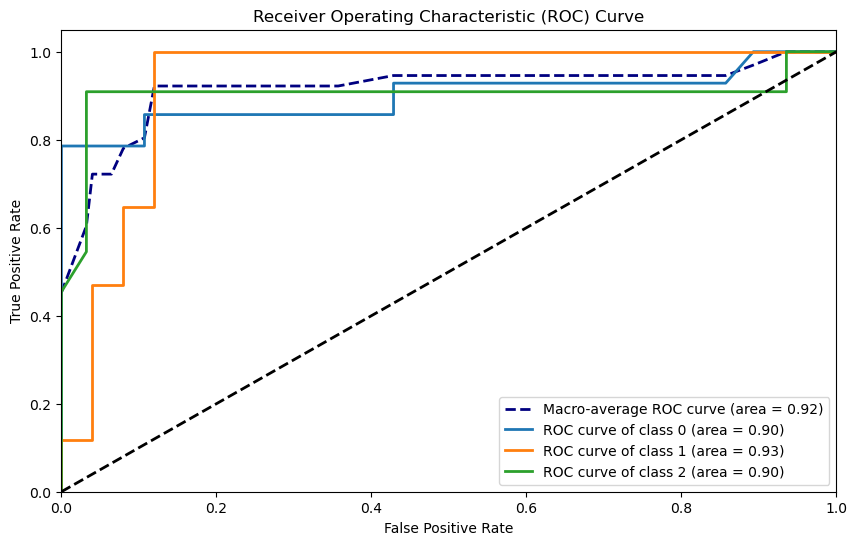

Macro-average AUC: 0.92
AUC of class 0: 0.90
AUC of class 1: 0.93
AUC of class 2: 0.90


In [137]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the SVM model with OneVsRestClassifier
svm_model = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma='auto', probability=True))
svm_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_score = svm_model.predict_proba(X_test_scaled)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', linewidth=2, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores
print(f'Macro-average AUC: {roc_auc["macro"]:.2f}')
for i in range(n_classes):
    print(f'AUC of class {i}: {roc_auc[i]:.2f}')
